In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df_cleaned = pd.read_csv('../data/processed/data_cleaned.csv')

In [4]:
# Split features and target
X = df_cleaned.drop(columns=['diagnosis'])
y = df_cleaned['diagnosis']

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [6]:
# Model paths
model_paths = {
    'Logistic Regression': '../models/logistic_regression.pkl',
    'Gradient Boosting': '../models/gradient_boosting.pkl',
    'LightGBM': '../models/lightgbm.pkl',
    'XGBoost': '../models/xgboost.pkl',
    'Catboost': '../models/catboost.pkl',
}

In [7]:
# Load models
models = {name: joblib.load(path) for name, path in model_paths.items()}

In [8]:
# Dict to store results
results = []

Evaluating Logistic Regression...
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        74
           1       1.00      0.97      0.99        40

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



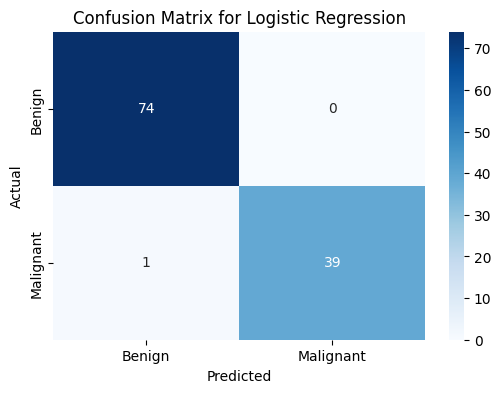

Evaluating Gradient Boosting...
Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        74
           1       0.95      1.00      0.98        40

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



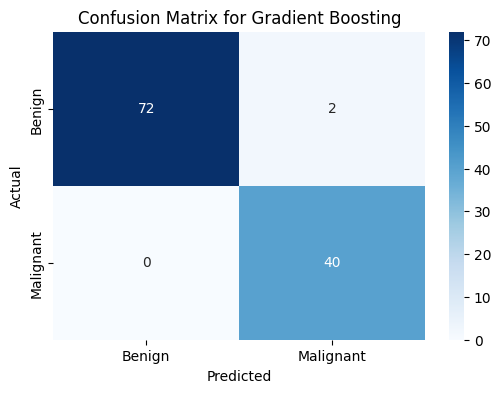

Evaluating LightGBM...
Classification Report for LightGBM:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        74
           1       1.00      0.97      0.99        40

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



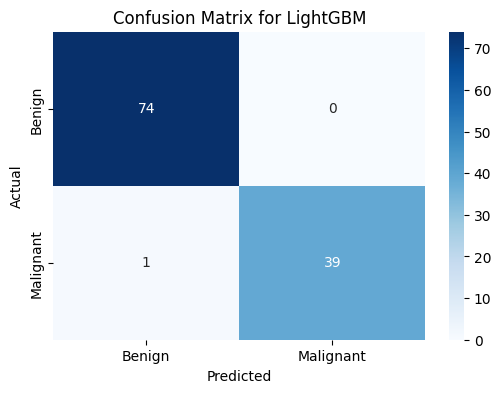

Evaluating XGBoost...
Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        74
           1       0.98      1.00      0.99        40

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



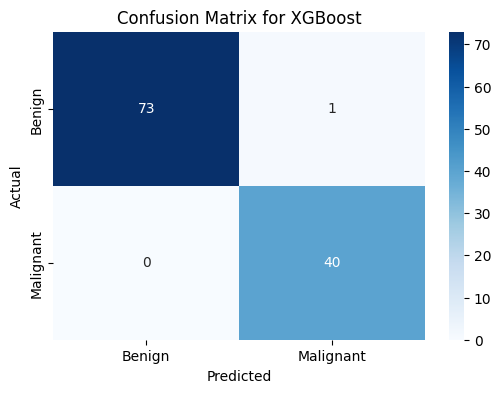

Evaluating Catboost...
Classification Report for Catboost:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        74
           1       0.98      1.00      0.99        40

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



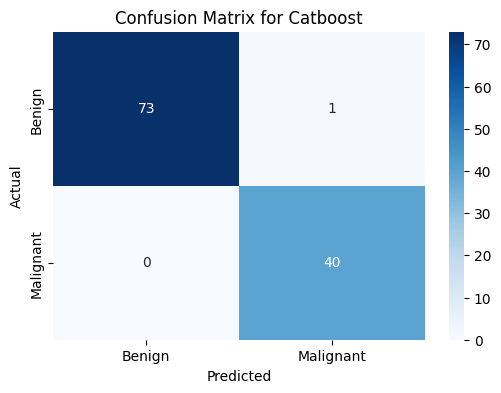

In [9]:
# Evaluate each model
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]


    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    roc_auc = roc_auc_score(y_test, y_proba)

    # Store results
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    })

    # Print classification report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Benign', 'Malignant'], 
                yticklabels=['Benign', 'Malignant'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [10]:
#Create a DF for the results
results_df = pd.DataFrame(results)

Model Performance Summary:
                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Logistic Regression  0.991228   1.000000   0.975  0.987342      1.0
1    Gradient Boosting  0.982456   0.952381   1.000  0.975610      1.0
2             LightGBM  0.991228   1.000000   0.975  0.987342      1.0
3              XGBoost  0.991228   0.975610   1.000  0.987654      1.0
4             Catboost  0.991228   0.975610   1.000  0.987654      1.0


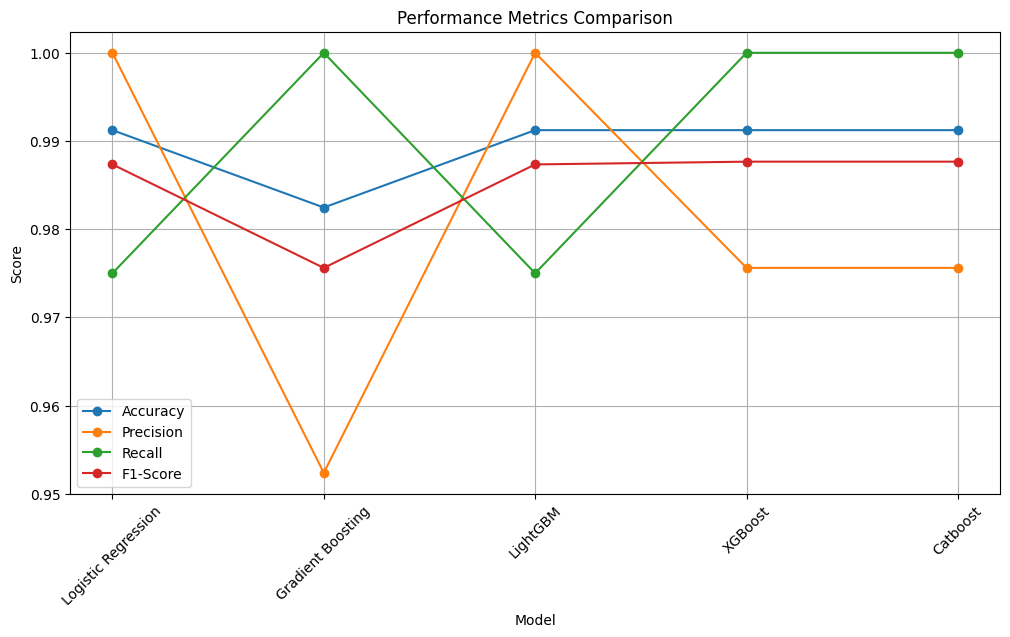

In [11]:
# Print and visualize the results
print("Model Performance Summary:")
print(results_df)

# Plot metrics comparison
plt.figure(figsize=(12, 6))
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    plt.plot(results_df['Model'], results_df[metric], marker='o', label=metric)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics Comparison')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()

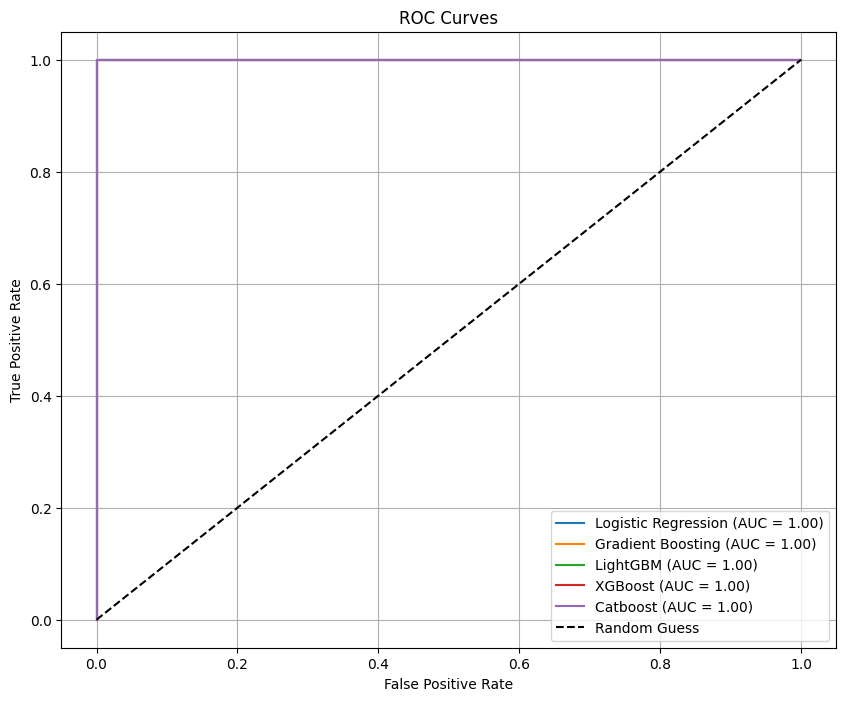

In [12]:
# Plot ROC Curves for all models
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    # Get predicted probabilities for the positive class
    y_proba = model.predict_proba(X_test)[:, 1]
    from sklearn.metrics import roc_curve
    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

# Plot a diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()

### Analysis of the Results

The models evaluated (Logistic Regression, Gradient Boosting, LightGBM, XGBoost, and CatBoost) show high accuracy and excellent predictive performance on the test set.

---

#### **1. Logistic Regression**
- **Accuracy**: 99.1%
- **Precision**: 100% for Class 1 (Malignant)
- **Recall**: 97.5% for Class 1 (Malignant)
- **F1-Score**: 98.7% for Class 1 (Malignant)
- **Confusion Matrix**:
  ```
  74   0
   1  39
  ```
  - Only one false negative (Malignant classified as Benign), indicating almost perfect recall.
  - Perfect precision (no false positives for Malignant).

**Key Insight**: Logistic Regression is highly effective, with near-perfect classification and interpretability as a simpler model.

---

#### **2. Gradient Boosting**
- **Accuracy**: 98.2%
- **Precision**: 95.2% for Class 1
- **Recall**: 100% for Class 1
- **F1-Score**: 97.6% for Class 1
- **Confusion Matrix**:
  ```
  72   2
   0  40
  ```
  - Two false positives for Malignant.
  - No false negatives, ensuring all Malignant cases are correctly identified (high recall).

**Key Insight**: Gradient Boosting trades off some precision for recall, making it useful for applications prioritizing no missed Malignant cases.

---

#### **3. LightGBM**
- **Accuracy**: 99.1%
- **Precision**: 100% for Class 1
- **Recall**: 97.5% for Class 1
- **F1-Score**: 98.7% for Class 1
- **Confusion Matrix**:
  ```
  74   0
   1  39
  ```
  - Identical to Logistic Regression in performance.
  - One false negative and perfect precision.

**Key Insight**: LightGBM combines simplicity is efficient and matches Logistic Regression's performance.

---

#### **4. XGBoost**
- **Accuracy**: 99.1%
- **Precision**: 97.6% for Class 1
- **Recall**: 100% for Class 1
- **F1-Score**: 98.8% for Class 1
- **Confusion Matrix**:
  ```
  73   1
   0  40
  ```
  - One false positive and no false negatives.

**Key Insight**: XGBoost has excellent recall and balances precision effectively, minimizing false negatives.

---

#### **5. CatBoost**
- **Accuracy**: 99.1%
- **Precision**: 97.6% for Class 1
- **Recall**: 100% for Class 1
- **F1-Score**: 98.8% for Class 1
- **Confusion Matrix**:
  ```
  73   1
   0  40
  ```
  - One false positive and no false negatives, mirroring XGBoost.

**Key Insight**: CatBoost performs identically to XGBoost, with high recall and slightly reduced precision.

---

### **Performance Comparison**
| Metric          | Logistic Regression | Gradient Boosting | LightGBM | XGBoost | CatBoost |
|------------------|---------------------|-------------------|----------|---------|----------|
| **Accuracy**     | 99.1%              | 98.2%            | 99.1%   | 99.1%  | 99.1%   |
| **Precision**    | 100.0%             | 95.2%            | 100.0%  | 97.6%  | 97.6%   |
| **Recall**       | 97.5%              | 100.0%           | 97.5%   | 100.0% | 100.0%  |
| **F1-Score**     | 98.7%              | 97.6%            | 98.7%   | 98.8%  | 98.8%   |
| **ROC-AUC**      | 1.0                | 1.0              | 1.0     | 1.0    | 1.0     |


### **Observations**
1. **Overall Performance**:
   - All models perform exceptionally well, with high F1-Scores, Accuracy, and ROC-AUC values.
   - Differences in performance are marginal, but minor trade-offs exist between precision and recall.

2. **Key Trade-Offs**:
   - **Logistic Regression and LightGBM**: Perfect precision but slightly lower recall, making them conservative predictors.
   - **Gradient Boosting, XGBoost, and CatBoost**: Perfect recall but slightly reduced precision, better for high-recall use cases like avoiding missed Malignant cases.


3. **Confusion Matrix Insights**:
   - Logistic Regression and LightGBM produce the fewest misclassifications, with only one false negative.
   - Gradient Boosting has more false positives but no false negatives, ideal for minimizing missed critical cases.

---

### **Deployment**
- **Logistic Regression**:
  - Suitable if simplicity and interpretability are priorities.
  - Effective for clinical scenarios where precision (avoiding unnecessary treatments) is important.
  
- **Gradient Boosting**:
  - Prioritize for cases where recall (detecting all Malignant cases) is essential, even if it introduces more false positives.

- **LightGBM, XGBoost, and CatBoost**:
  - Excellent alternatives combining strong recall with slightly reduced precision.